# Prediction and Exploratory Data Analysis of the Hotel Booking Deman with Python

According to Antonio et al,.(2019) the Booking dataset composes of two hotel demand data. (H1 in Portugal) is a resort hotel and (H2 in the city of Lisbon) a city hotel. Each observation represents a hotel booking from 1rst of Jult 2015 to 31st of August 2017 including successful  and canceled visit. 

# Prediction

> The purpose of this project is to predict a hotel booking demand using the Hotel dataset. It can be downloded in links below: https://www.kaggle.com/jessemostipak/hotel-booking-demand and also from https://www.sciencedirect.com/science/article/pii/S2352340918315191#ec0010

#  Variables description.
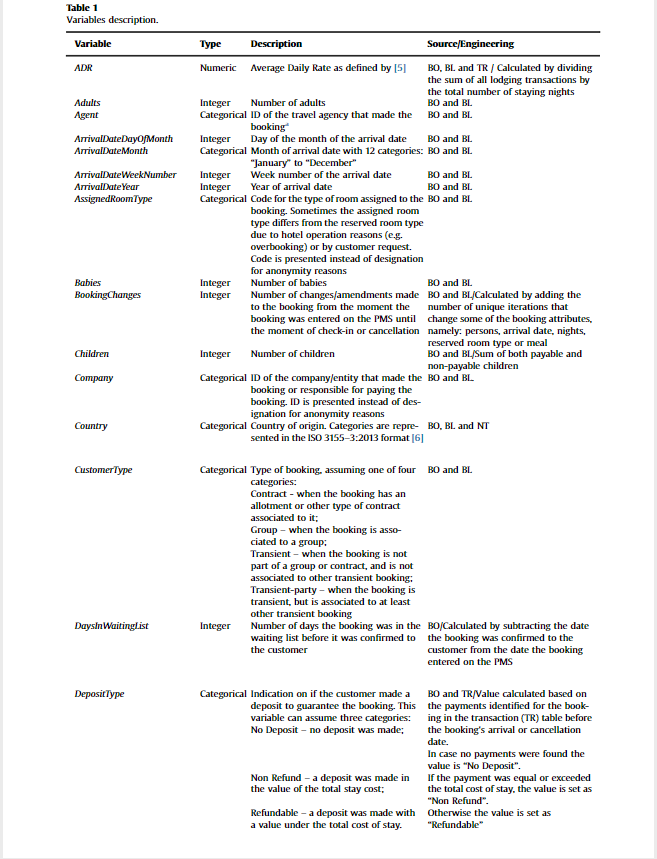

Credit for Antonio'Team to retreive all the information related to the data dictionary.


    

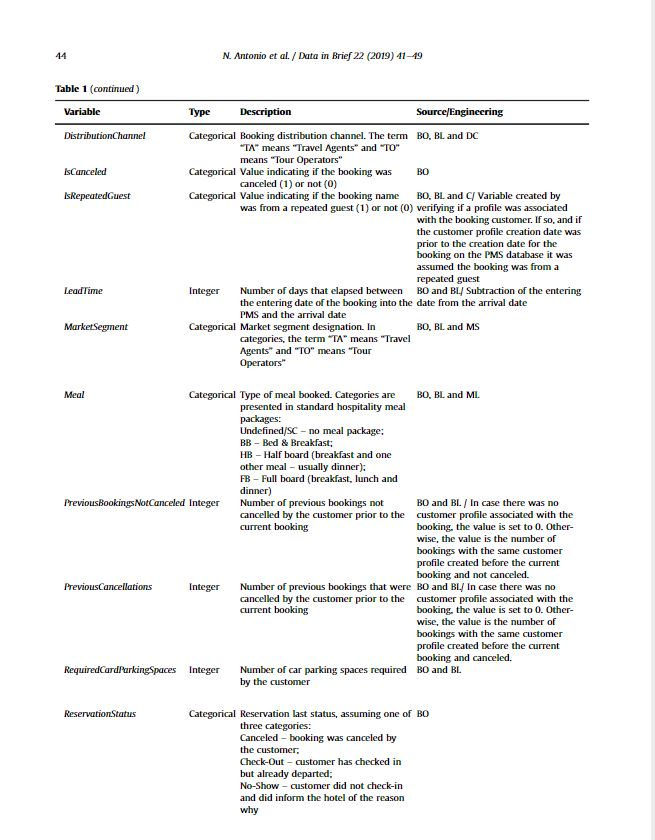

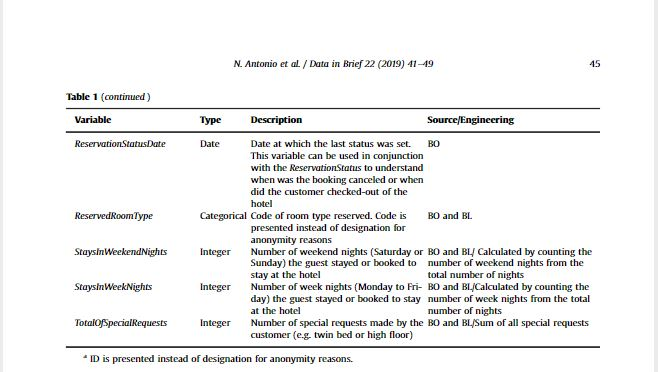


The project consists of 6 parts which is listed below: 

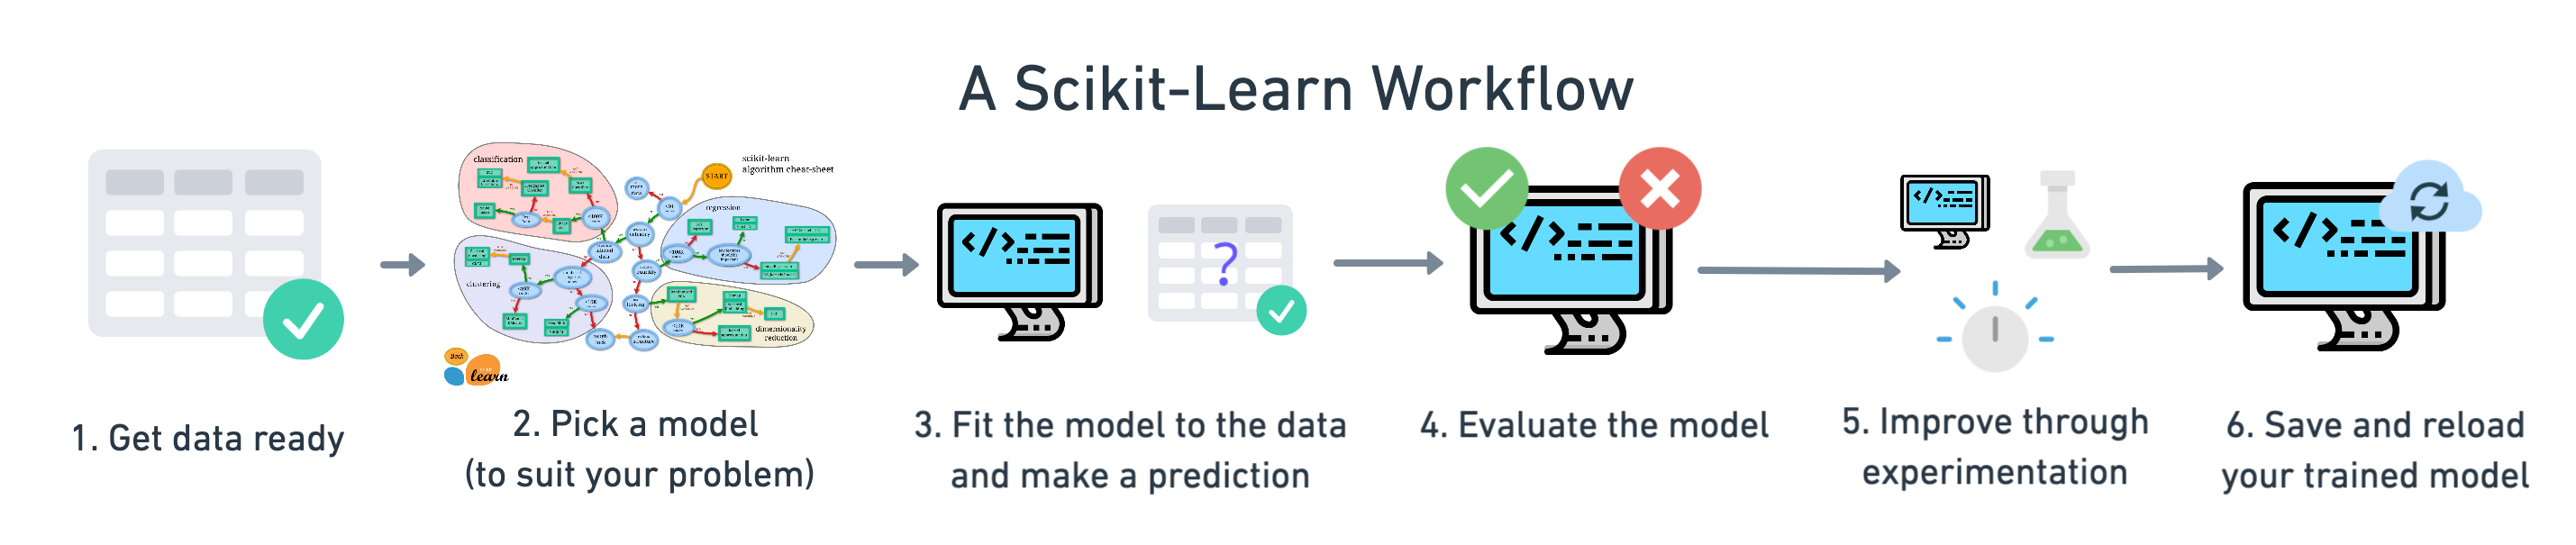

We are going to iniatialize all the libraries needed for Exploratory data analysis, and data modeling. 

In [189]:
# Import library for EDA 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import plotly.express as px

# Modeling libraries 
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import r2_score, accuracy_score,auc,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

sns.set(style='white')

import warnings 
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)
EDA reveals all important imformation about a dataset and help understanding keys characteristics about columns, rows, features and labels. The purpose of of using the EDA is grasp a clearn understanding of the hotel booking. It is clear pathway to tell a story about the dataset. 
> what do we do  in that phase ? 
 *  Understanding the given dataset and helps clean up the given dataset.
 *  It gives you a clear picture of the features and the relationships between them.
 *  Providing guidelines for essential variables and leaving behind/removing non-essential variables.
 *  Handling Missing values or human error.
 *  Identifying outliers.
 *  EDA process would be maximizing insights of a dataset.
 
 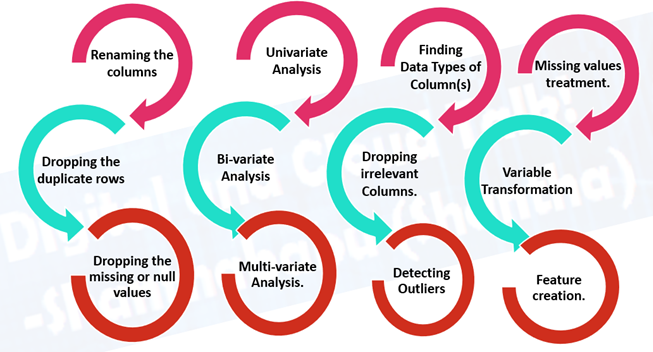
 

First, let's load the data and retreive basic information from it before transforming it 

In [2]:
# Load the hotel booking data 
data = pd.read_csv('data.csv')
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              01-07-2015  
1              01-07-2015  
2              02-07-2015  
3              02-07-2015  
4              03-07-2015  

[5 rows x 32 columns]

In [82]:
# print the dataset information!
print("###############################################################")
print('                     Hotel Booking Info')
print("###############################################################")
data.info()

###############################################################
                     Hotel Booking Info
###############################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          11

In [3]:
# check if there any missing data
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Now, It is important to indentify which features and labels we want for our analysis during this phase 

In [4]:
# # Let's prepare the data 
NAN_replacements = {'children': 0,'country':'Unknown', 'agent': 0,
                   'company': 0}
cleaned_data = data.fillna(NAN_replacements)
# All the undefined meal are considered as SC meals 
cleaned_data['meal'].replace('Undefined', 'SC', inplace=True)
# Data point with 0 occupants ( 0 adults + 0 children + 0 babies) are removed 
zeros_visitors = list(cleaned_data[cleaned_data['adults']
                                  + cleaned_data['children']
                                  + cleaned_data['babies']== 0].index)
cleaned_data.drop(cleaned_data.index[zeros_visitors], inplace = True)

In [5]:
# save the file to Hotel3.csv 
cleaned_data.to_csv(r'Hotel_new.csv',index =False)
cleaned_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    0.0     0.0                    0     Transient   0.0   
1    0.0     0.0                    0     Transient   0.0   
2    0.0     0.0                    0     Transient  75.0   
3  304.0     0.0                    0     Transient  75.0   
4  240.0     0.0                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              01-07-2015  
1              01-07-2015  
2              02-07-2015  
3              02-07-2015  
4              03-07-2015  

[5 rows x 32 columns]

See how many people booked their hotel in a resort and hotel. 
> Notice: Resorts are from Portugal and Hotels are in the city of Lisbon


In [6]:
# Separating the data into resort and hotel 
resort = cleaned_data[cleaned_data['hotel']== 'Resort Hotel']
resort.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    0.0     0.0                    0     Transient   0.0   
1    0.0     0.0                    0     Transient   0.0   
2    0.0     0.0                    0     Transient  75.0   
3  304.0     0.0                    0     Transient  75.0   
4  240.0     0.0                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              01-07-2015  
1              01-07-2015  
2              02-07-2015  
3              02-07-2015  
4              03-07-2015  

[5 rows x 32 columns]

In [7]:
# hotel data
hotel = cleaned_data[cleaned_data["hotel"]== 'City Hotel']
hotel.head()

hotel  is_canceled  lead_time  arrival_date_year  \
40060  City Hotel            0          6               2015   
40061  City Hotel            1         88               2015   
40062  City Hotel            1         65               2015   
40063  City Hotel            1         92               2015   
40064  City Hotel            1        100               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
40060               July                        27                          1   
40061               July                        27                          1   
40062               July                        27                          1   
40063               July                        27                          1   
40064               July                        27                          2   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
40060                        0                     2       1  ...   
40061                        0                     4       2  ...   
40062                        0                     4       1  ...   
40063                        2                     4       2  ...   
40064                        0                     2       2  ...   

       deposit_type  agent company days_in_waiting_list customer_type   adr  \
40060    No Deposit    6.0     0.0                    0     Transient   0.0   
40061    No Deposit    9.0     0.0                    0     Transient  76.5   
40062    No Deposit    9.0     0.0                    0     Transient  68.0   
40063    No Deposit    9.0     0.0                    0     Transient  76.5   
40064    No Deposit    9.0     0.0                    0     Transient  76.5   

       required_car_parking_spaces  total_of_special_requests  \
40060                            0                          0   
40061                            0                          1   
40062                            0                          1   
40063                            0                          2   
40064                            0                          1   

       reservation_status reservation_status_date  
40060           Check-Out              03-07-2015  
40061            Canceled              01-07-2015  
40062            Canceled              30-04-2015  
40063            Canceled              23-06-2015  
40064            Canceled              02-04-2015  

[5 rows x 32 columns]

Now lets see how busy are these hotel 


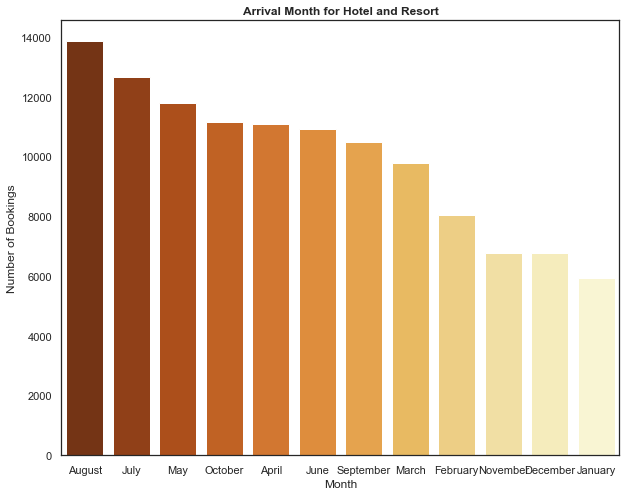

In [18]:
# take a look at all the arriving customers by month 
plt.figure(figsize= (10,8));
sns.countplot(x='arrival_date_month', data= cleaned_data,
             order=pd.value_counts(cleaned_data['arrival_date_month']).index, palette= 'YlOrBr_r');
plt.title('Arrival Month for Hotel and Resort', weight='bold');
plt.xlabel('Month', fontsize= 12);
plt.ylabel('Number of Bookings', fontsize=12);

Let check separately for hotels and resort 


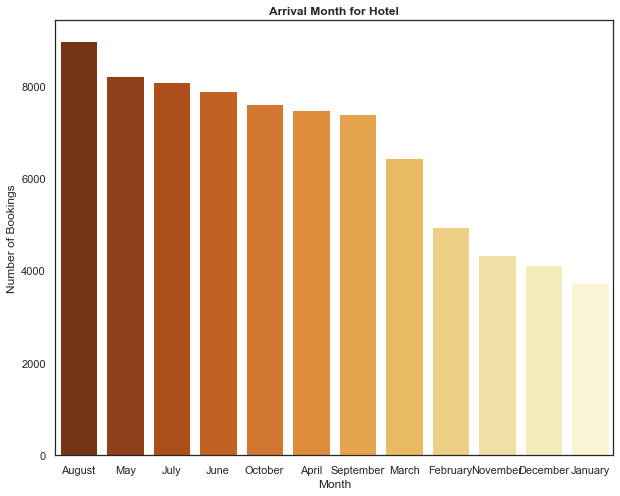

In [35]:
plt.figure(figsize= (10,8));
sns.countplot(x='arrival_date_month', data= hotel,
             order=pd.value_counts(hotel['arrival_date_month']).index, palette= 'YlOrBr_r');
plt.title('Arrival Month for Hotel', weight='bold');
plt.xlabel('Month', fontsize= 12);
plt.ylabel('Number of Bookings', fontsize=12);



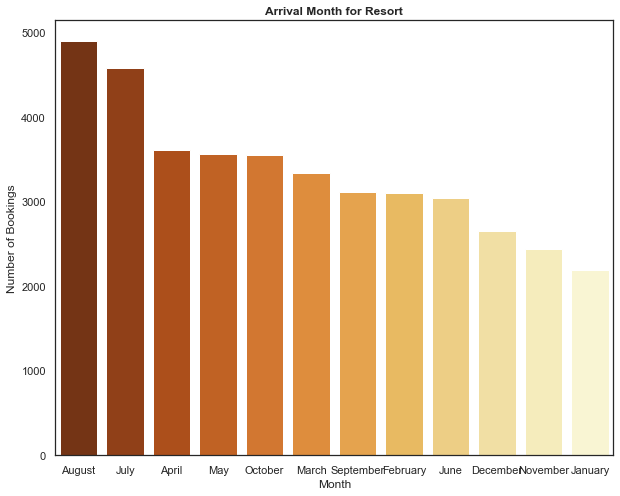

In [34]:
plt.figure(figsize= (10,8));


sns.countplot(x='arrival_date_month', data= resort,
             order=pd.value_counts(resort['arrival_date_month']).index, palette= 'YlOrBr_r');

plt.title('Arrival Month for Resort', weight='bold');
plt.xlabel('Month', fontsize= 12);
plt.ylabel('Number of Bookings', fontsize=12);


There are significant decrease in the amount of customer that arrive in April, May, october compare to the percentage of people booking hotel in Lisbon. 
Lets look at the number of customers per country

In [9]:
# Numbers of actual customers by country 
country = pd.DataFrame(cleaned_data[cleaned_data['is_canceled']== 0]['country'].value_counts())

country.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country["Number of Guests"].sum()
country['Guest %'] = round(country['Number of Guests'] / total_guests * 100, 2)
country['country'] = country.index
country.head(20)

Number of Guests  Guest %  country
PRT                 20977    27.97      PRT
GBR                  9668    12.89      GBR
FRA                  8468    11.29      FRA
ESP                  6383     8.51      ESP
DEU                  6067     8.09      DEU
IRL                  2542     3.39      IRL
ITA                  2428     3.24      ITA
BEL                  1868     2.49      BEL
NLD                  1716     2.29      NLD
USA                  1592     2.12      USA
BRA                  1392     1.86      BRA
CHE                  1298     1.73      CHE
AUT                  1033     1.38      AUT
CN                   1025     1.37       CN
SWE                   793     1.06      SWE
POL                   703     0.94      POL
CHN                   537     0.72      CHN
ISR                   500     0.67      ISR
NOR                   426     0.57      NOR
Unknown               421     0.56  Unknown

In [10]:
# Lets do a pie plot to have a graphical representation of the succefull booking by county
fig = px.pie(country,
            values = "Number of Guests",
            names = "country",
            title = "Guest by country",
            template = 'seaborn')

fig.update_traces(textposition= 'inside', textinfo='value+percent+label')
fig.show()

Most travellers are from Portugal, Bulgaria, France and Spain. Please, see country code below: 

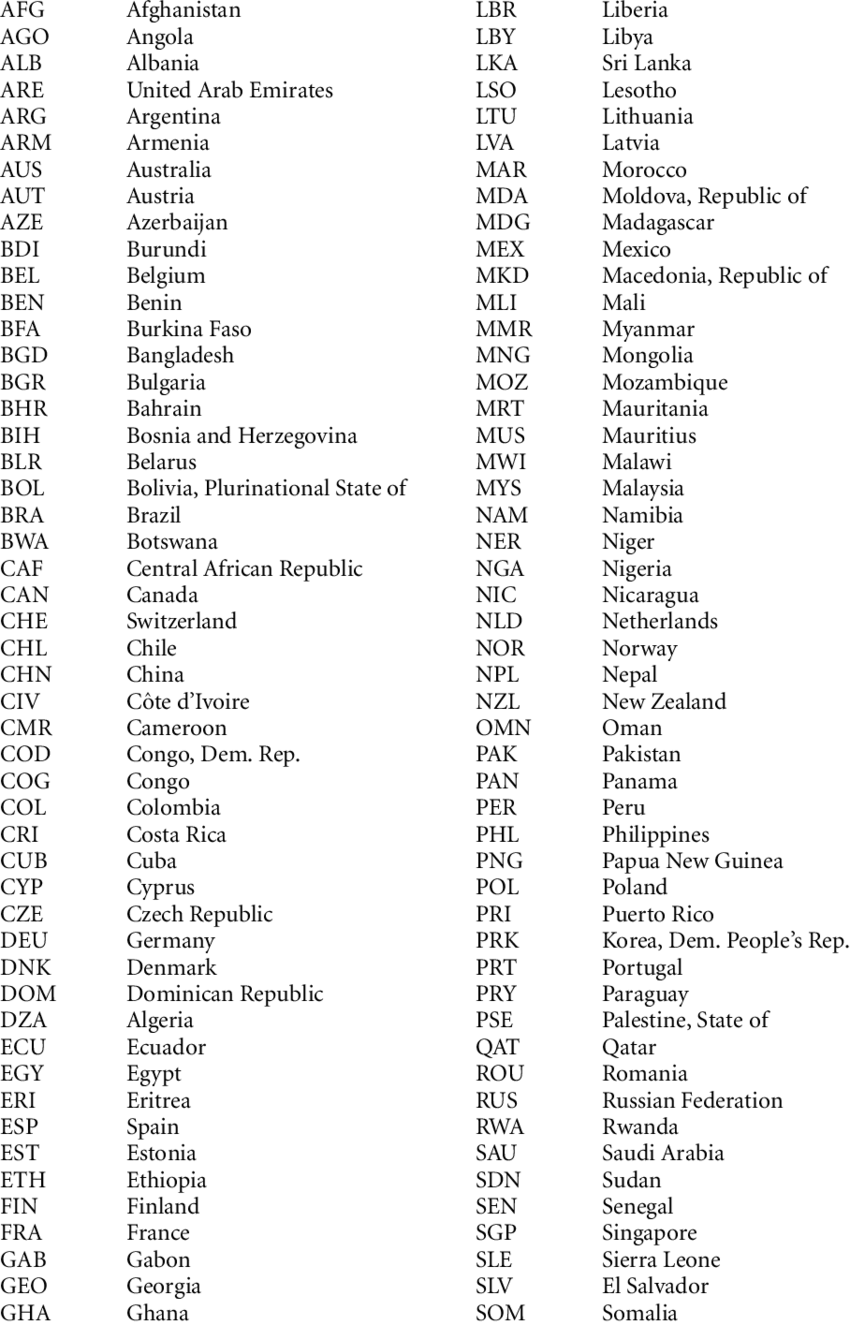

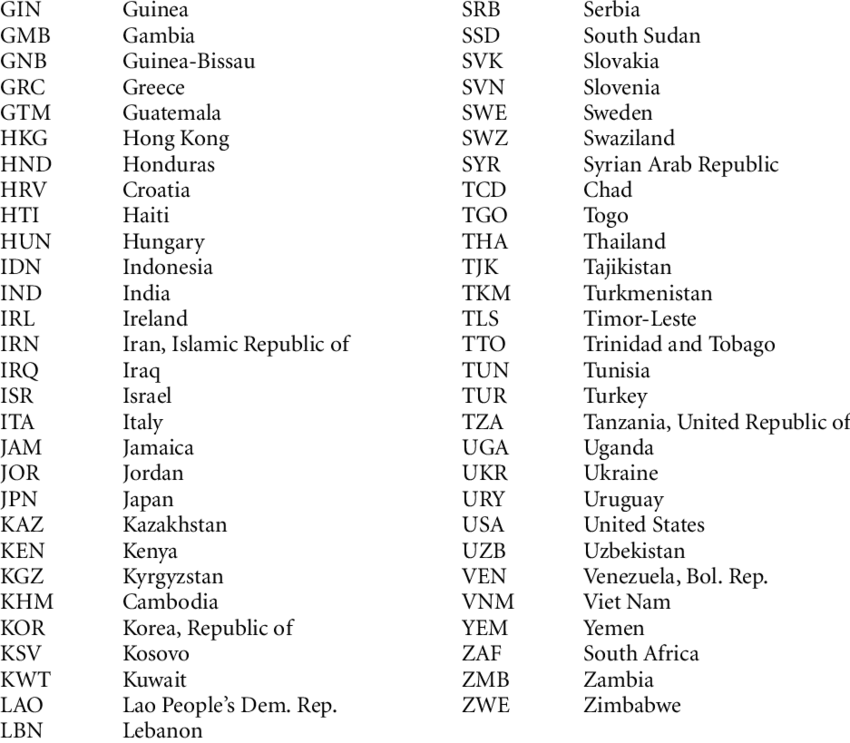

We are taking a look on how hotel booking are made.  Booking can either make via 
*    Corporation, 
*    Direct customer pay
*    Oneline Travel TA/TO
*    Offline TA/TO
*    Complementary
*    Groups
*    Aviation

See Boxplot below
     

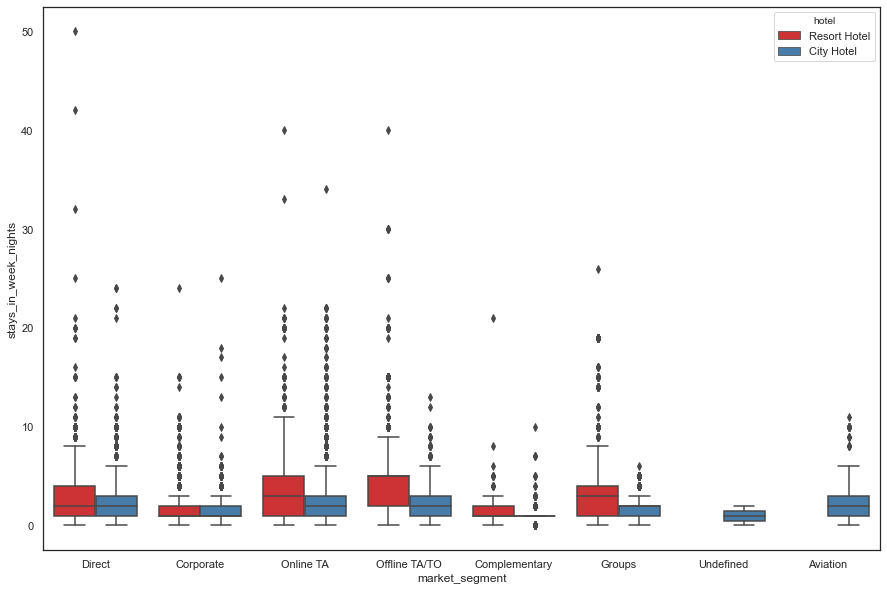

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(x='market_segment', y = 'stays_in_week_nights', data= cleaned_data, hue='hotel',palette = "Set1");

Online Travent Agents contribute to most booking when looking at the upper quatile. Now let see on a bar graph the actual bokking compare to others

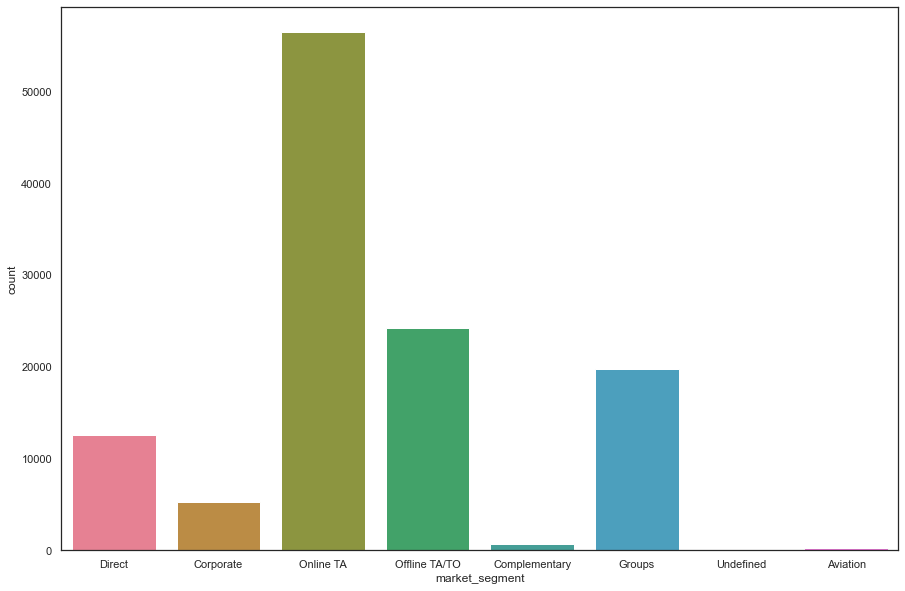

In [50]:
plt.figure(figsize= (15,10))
sns.countplot(cleaned_data['market_segment'], palette = 'husl')
plt.show()

Lets over the kind of customers that made the transactions. 
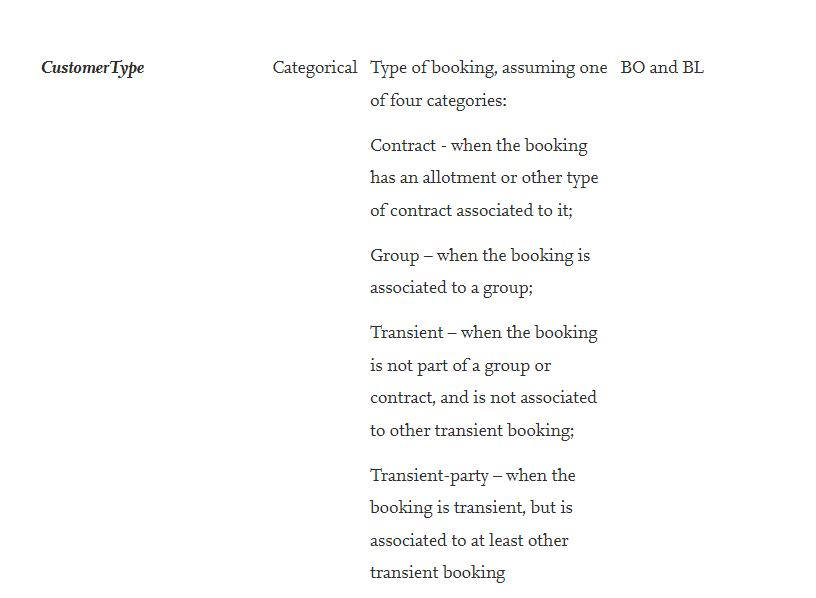

<AxesSubplot:xlabel='customer_type', ylabel='count'>

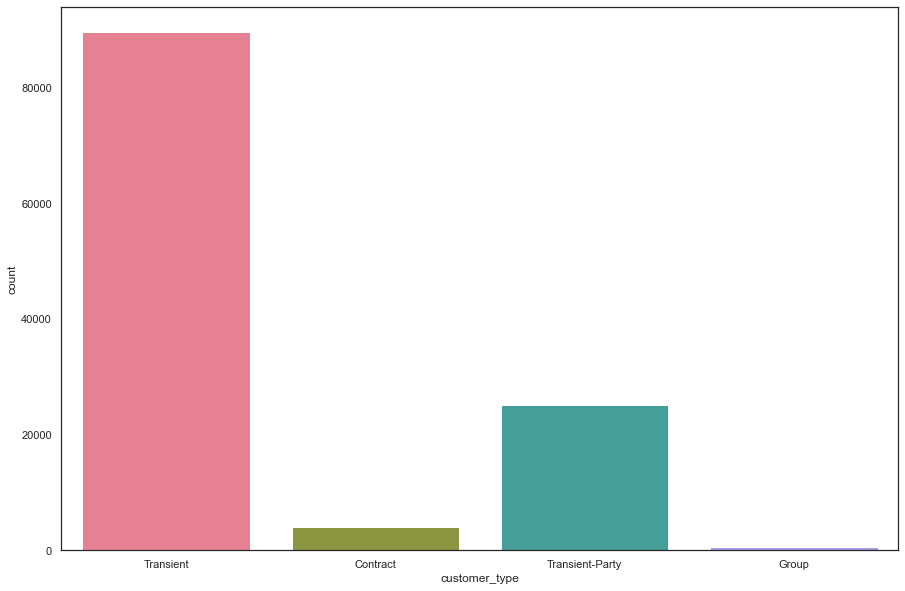

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(cleaned_data['customer_type'], palette = "husl")

Most people personally booked their trip for either vaccation or leisure time. 
Lets dive deeper in the booking business. 

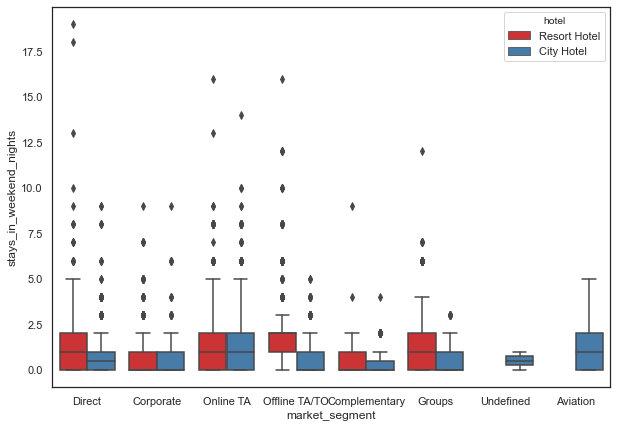

In [67]:
plt.figure(figsize=(10,7))
sns.boxplot(x='market_segment',y = 'stays_in_weekend_nights', data=cleaned_data, hue = 'hotel', palette = 'Set1');

In [68]:
cleaned_data['n_nights'] = cleaned_data['stays_in_weekend_nights'] - cleaned_data['stays_in_week_nights']
cleaned_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  company  \
0                        0                     0       2  ...    0.0      0.0   
1                        0                     0       2  ...    0.0      0.0   
2                        0                     1       1  ...    0.0      0.0   
3                        0                     1       1  ...  304.0      0.0   
4                        0                     2       2  ...  240.0      0.0   

  days_in_waiting_list customer_type   adr required_car_parking_spaces  \
0                    0     Transient   0.0                           0   
1                    0     Transient   0.0                           0   
2                    0     Transient  75.0                           0   
3                    0     Transient  75.0                           0   
4                    0     Transient  98.0                           0   

   total_of_special_requests  reservation_status  reservation_status_date  \
0                          0           Check-Out               01-07-2015   
1                          0           Check-Out               01-07-2015   
2                          0           Check-Out               02-07-2015   
3                          0           Check-Out               02-07-2015   
4                          1           Check-Out               03-07-2015   

  n_nights  
0        0  
1        0  
2       -1  
3       -1  
4       -2  

[5 rows x 33 columns]

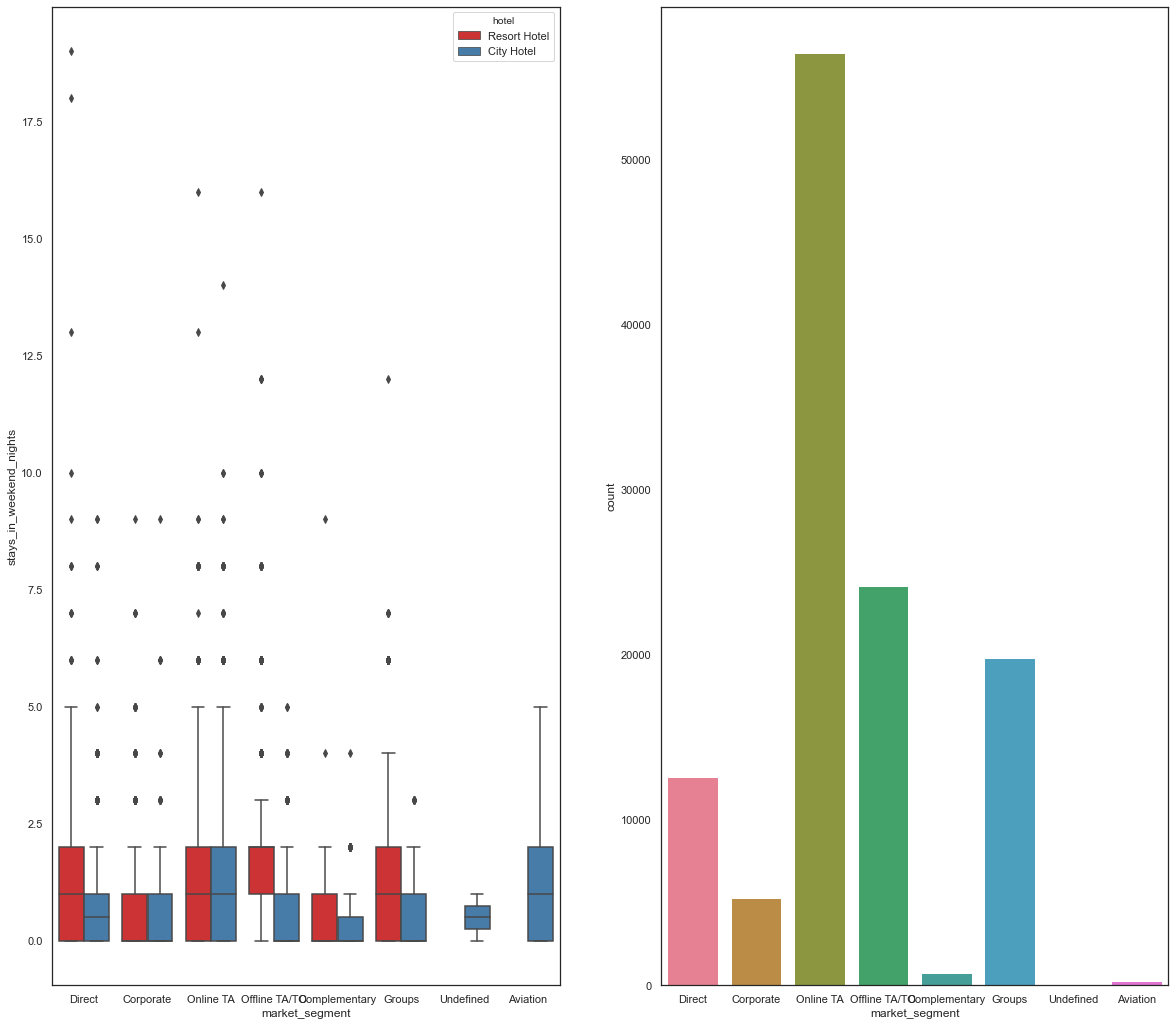

In [80]:
fig, ((ax1,ax2)) = plt.subplots(1,2,figsize=(20,18))
ax1 = sns.boxplot(x='market_segment',y = 'stays_in_weekend_nights',
                  data=cleaned_data, hue = 'hotel', palette = 'Set1', ax=ax1);
ax2 = sns.countplot(cleaned_data['market_segment'], palette = 'husl', ax= ax2)


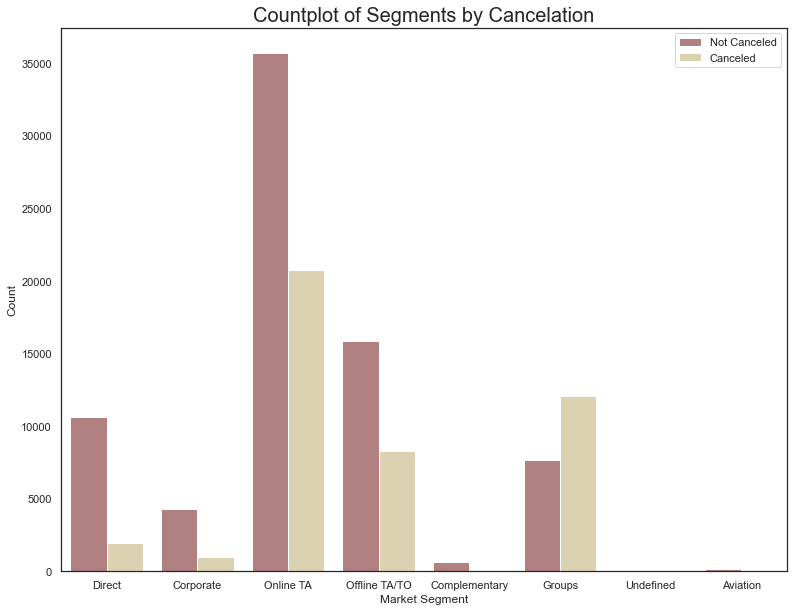

In [18]:
fig, ax1 = plt.subplots(figsize=(13,10))
ax = sns.countplot(cleaned_data['market_segment'], hue = cleaned_data['is_canceled'], data=cleaned_data, palette='pink');
ax.set(xlabel='Market Segment', ylabel='Count')
plt.title('Countplot of Segments by Cancelation', fontdict = {"fontsize" : 20})
LAB = {'Canceled','Not Canceled'}
ax.legend(labels=LAB)

More than 20000 hotels has been canceled. Now, we have some some insights of the data. we are building an understanding the problem we are trying to solve.

Text(0.5, 1.0, 'Countplot Distribution of Segments by Cancellation')

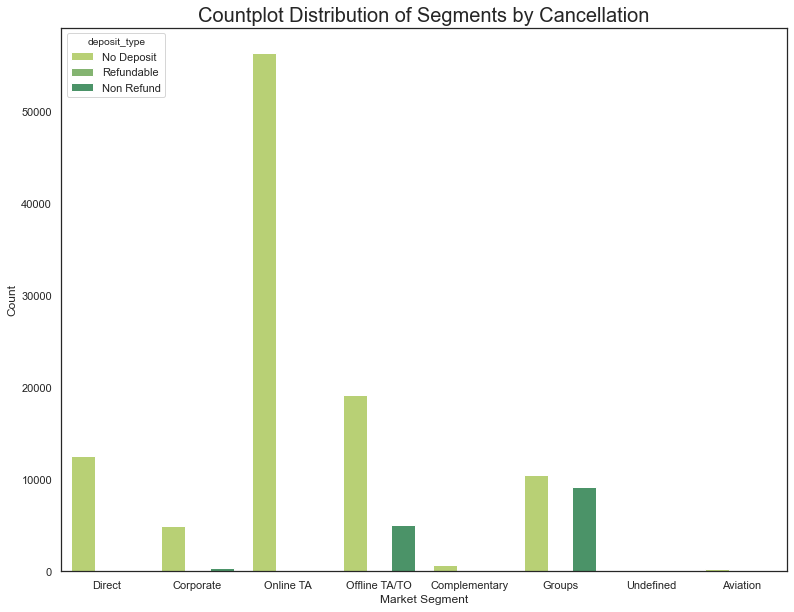

In [20]:
fig, ax = plt.subplots(figsize=(13,10))
ax = sns.countplot(cleaned_data['market_segment'], hue = cleaned_data['deposit_type'], palette = 'summer_r')
ax.set(xlabel='Market Segment', ylabel='Count')
plt.title("Countplot Distribution of Segments by Cancellation", fontdict = {'fontsize':20})

Most Resort and Hotels allow customer to book their rooms with or without deposit. Some booking are non-refundable while others are or partally refundaable

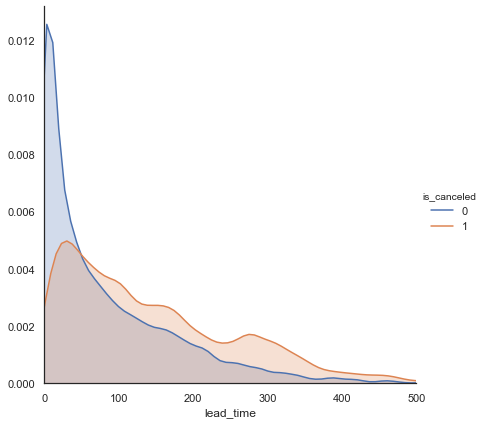

In [25]:
(sns.FacetGrid(cleaned_data, hue= 'is_canceled',
              height = 6,
              xlim = (0,500)).map(sns.kdeplot,'lead_time',shade=True).add_legend());



Now, lets look into the guess. What can we discover about them? 


In [26]:
# How much do guests pay for a room per night? 
cleaned_data['adr_pp'] = cleaned_data['adr'] / (cleaned_data['adults'] + cleaned_data['children'])
cleaned_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  company  \
0                        0                     0       2  ...    0.0      0.0   
1                        0                     0       2  ...    0.0      0.0   
2                        0                     1       1  ...    0.0      0.0   
3                        0                     1       1  ...  304.0      0.0   
4                        0                     2       2  ...  240.0      0.0   

  days_in_waiting_list customer_type   adr required_car_parking_spaces  \
0                    0     Transient   0.0                           0   
1                    0     Transient   0.0                           0   
2                    0     Transient  75.0                           0   
3                    0     Transient  75.0                           0   
4                    0     Transient  98.0                           0   

   total_of_special_requests  reservation_status  reservation_status_date  \
0                          0           Check-Out               01-07-2015   
1                          0           Check-Out               01-07-2015   
2                          0           Check-Out               02-07-2015   
3                          0           Check-Out               02-07-2015   
4                          1           Check-Out               03-07-2015   

  adr_pp  
0    0.0  
1    0.0  
2   75.0  
3   75.0  
4   49.0  

[5 rows x 33 columns]

In [28]:
# Select only those with actual reservations
cleaned_data_guest = cleaned_data[cleaned_data['is_canceled'] == 0] # Only actual guest 
Room_prices = cleaned_data_guest[['hotel','reserved_room_type','adr_pp']].sort_values('reserved_room_type')
Room_prices.head()

hotel reserved_room_type  adr_pp
119389  City Hotel                  A   75.60
102432  City Hotel                  A   89.55
77019   City Hotel                  A   53.00
77020   City Hotel                  A   53.00
77021   City Hotel                  A   50.40

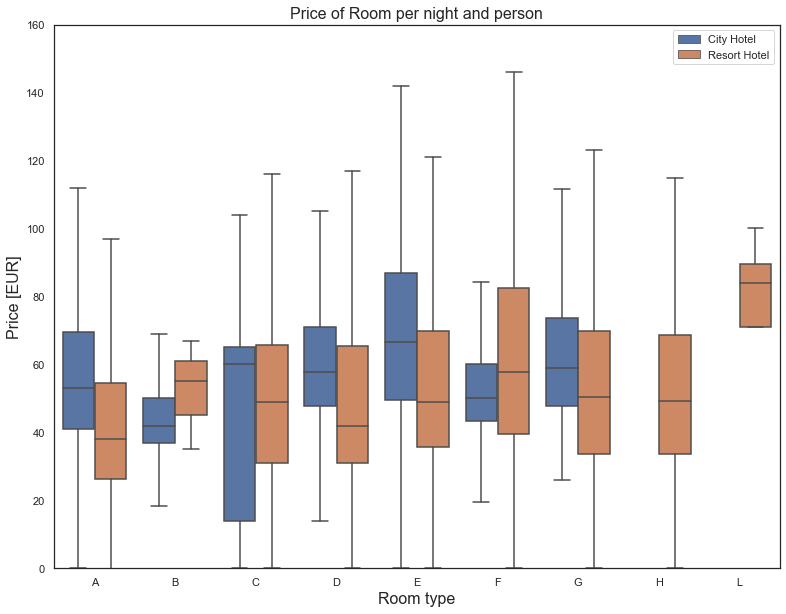

In [30]:
plt.figure(figsize=(13,10))
sns.boxplot(x='reserved_room_type',
           y = 'adr_pp',
           hue='hotel',
           data= Room_prices,
           hue_order = ['City Hotel','Resort Hotel'],
           fliersize=0)

plt.title('Price of Room per night and person', fontsize= 16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel('Price [EUR]', fontsize = 16)
plt.legend(loc='upper right')
plt.ylim(0,160)
plt.show()

In [31]:
room_price_mthl = cleaned_data_guest[['hotel','arrival_date_month','adr_pp']].sort_values('arrival_date_month')
room_price_mthl.head()

hotel arrival_date_month  adr_pp
48869   City Hotel              April   81.90
110755  City Hotel              April  115.00
110756  City Hotel              April   57.50
110757  City Hotel              April   65.25
110758  City Hotel              April   65.25

In [33]:
# Order by month 
ordered_mthl = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_price_mthl['arrival_date_month'] == pd.Categorical(room_price_mthl['arrival_date_month'],categories = ordered_mthl)

48869     True
110755    True
110756    True
110757    True
110758    True
          ... 
43535     True
43534     True
43533     True
43577     True
98565     True
Name: arrival_date_month, Length: 75011, dtype: bool

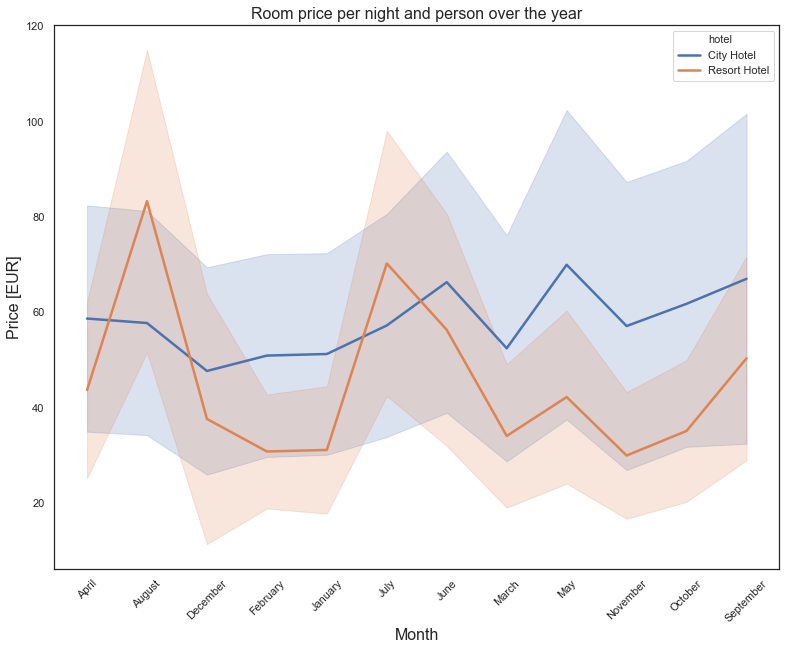

In [35]:
plt.figure(figsize= (13,10))
sns.lineplot(x='arrival_date_month',
            y = 'adr_pp', hue='hotel',
            data= room_price_mthl,
            hue_order = ['City Hotel', 'Resort Hotel'],
            ci= 'sd', size = 'hotel',
            sizes= (2.5,2.5))

plt.title('Room price per night and person over the year', fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

Text(0.5, 1.0, 'ADR vs Arrival Month')

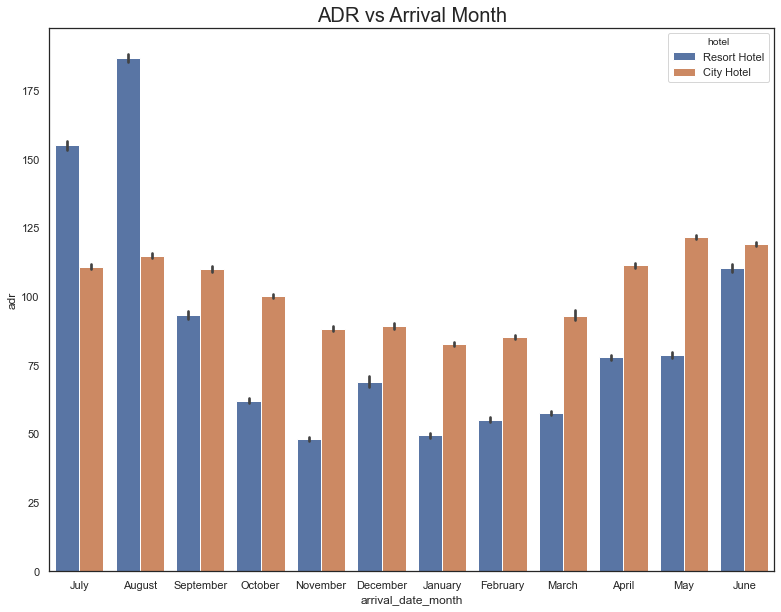

In [36]:
plt.figure(figsize=(13,10))
sns.barplot(x='arrival_date_month',y='adr', hue='hotel', data=cleaned_data)
plt.title('ADR vs Arrival Month', fontdict = {'fontsize': 20})

We notice before that August was the month that had most bookings for both Hotels and Resorts

In [39]:
#  group data by leadtime 
cancel_lead_time = cleaned_data.groupby('lead_time')['is_canceled'].describe()
cancel_lead_time.head()

count      mean       std  min  25%  50%  75%  max
lead_time                                                     
0          6264.0  0.066571  0.249297  0.0  0.0  0.0  0.0  1.0
1          3445.0  0.092308  0.289502  0.0  0.0  0.0  0.0  1.0
2          2065.0  0.103148  0.304225  0.0  0.0  0.0  0.0  1.0
3          1815.0  0.100275  0.300450  0.0  0.0  0.0  0.0  1.0
4          1710.0  0.102339  0.303182  0.0  0.0  0.0  0.0  1.0

Lead Time is the Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

In [55]:
cancel_lead_time_10 = cancel_lead_time.loc[cancel_lead_time['count'] >= 10]
cancel_lead_time_10.head()

count      mean       std  min  25%  50%  75%  max
lead_time                                                     
0          6264.0  0.066571  0.249297  0.0  0.0  0.0  0.0  1.0
1          3445.0  0.092308  0.289502  0.0  0.0  0.0  0.0  1.0
2          2065.0  0.103148  0.304225  0.0  0.0  0.0  0.0  1.0
3          1815.0  0.100275  0.300450  0.0  0.0  0.0  0.0  1.0
4          1710.0  0.102339  0.303182  0.0  0.0  0.0  0.0  1.0

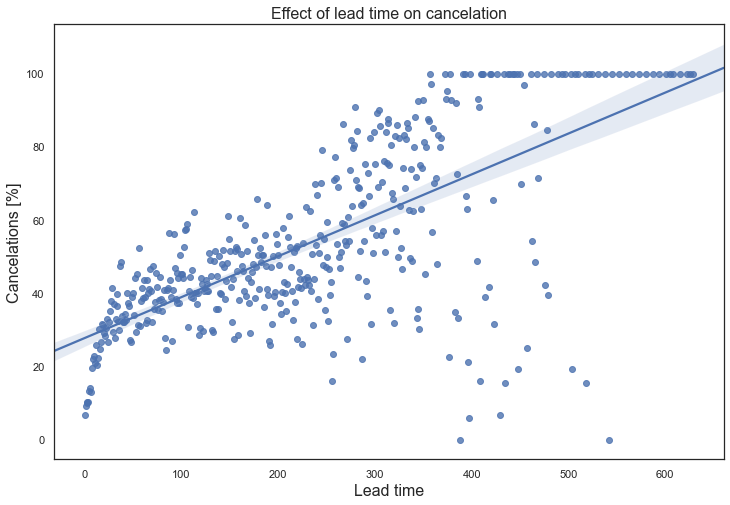

In [71]:
cancel_m = cancel_lead_time_10["mean"]
plt.figure(figsize=(12, 8))

sns.regplot(x=list(cancel_lead_time_10.index), y = cancel_lead_time_10["mean"].values*100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()

# Feature Engineering and Correlation Matrix
The picture above shows that there is a high correlation between lead time and Cancelation mean. We are going to transform the data into numeric to fit the right algorithm. 

# Label Encoding : 
   > We are going to use the LabelEncoder in scikit - learn library. It is utlity class to help normalize labels with only values between 0 and -1. 

# What is Feature Engineering? 
According to Scott Locklin, in “Neglected machine learning ideas”, feature engineering is another topic which doesn’t seem to merit any review papers or books, or even chapters in books, but it is absolutely vital to ML success. […] Much of the success of machine learning is actually success in engineering features that a learner can understand.

These are steps that enforce Feature Engineering: 
   > Feature Selection
   
   > Handling missing values
   
   > Handling imbalanced data

   > Handling outliers
   
   > Binning

   > Encoding
   
   > Feature Scaling


In [77]:
# transform the data 
labelencoder = LabelEncoder()
cleaned_data['hotel'] = labelencoder.fit_transform(cleaned_data['hotel'])
cleaned_data['arrival_date_month'] = labelencoder.fit_transform(cleaned_data['arrival_date_month'])
cleaned_data['meal'] = labelencoder.fit_transform(cleaned_data['meal'])
cleaned_data['country'] = labelencoder.fit_transform(cleaned_data['country'])
cleaned_data["market_segment"] = labelencoder.fit_transform(cleaned_data['market_segment'])
cleaned_data['distribution_channel'] = labelencoder.fit_transform(cleaned_data['distribution_channel'])
cleaned_data["is_repeated_guest"] = labelencoder.fit_transform(cleaned_data['is_repeated_guest'])
cleaned_data["reserved_room_type"] = labelencoder.fit_transform(cleaned_data['reserved_room_type'])
cleaned_data['assigned_room_type'] = labelencoder.fit_transform(cleaned_data['assigned_room_type'])
cleaned_data['deposit_type'] = labelencoder.fit_transform(cleaned_data['deposit_type'])
cleaned_data['agent'] = labelencoder.fit_transform(cleaned_data['agent'])
cleaned_data['customer_type'] = labelencoder.fit_transform(cleaned_data['customer_type'])
cleaned_data['reservation_status'] = labelencoder.fit_transform(cleaned_data['reservation_status'])
cleaned_data['reservation_status_date'] = labelencoder.fit_transform(cleaned_data['reservation_status_date'])

In [78]:
# see the newly trasformed data 
cleaned_data.head(20)

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0       1            0        342               2015                   5   
1       1            0        737               2015                   5   
2       1            0          7               2015                   5   
3       1            0         13               2015                   5   
4       1            0         14               2015                   5   
5       1            0         14               2015                   5   
6       1            0          0               2015                   5   
7       1            0          9               2015                   5   
8       1            1         85               2015                   5   
9       1            1         75               2015                   5   
10      1            1         23               2015                   5   
11      1            0         35               2015                   5   
12      1            0         68               2015                   5   
13      1            0         18               2015                   5   
14      1            0         37               2015                   5   
15      1            0         68               2015                   5   
16      1            0         37               2015                   5   
17      1            0         12               2015                   5   
18      1            0          0               2015                   5   
19      1            0          7               2015                   5   

    arrival_date_week_number  arrival_date_day_of_month  \
0                         27                          1   
1                         27                          1   
2                         27                          1   
3                         27                          1   
4                         27                          1   
5                         27                          1   
6                         27                          1   
7                         27                          1   
8                         27                          1   
9                         27                          1   
10                        27                          1   
11                        27                          1   
12                        27                          1   
13                        27                          1   
14                        27                          1   
15                        27                          1   
16                        27                          1   
17                        27                          1   
18                        27                          1   
19                        27                          1   

    stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  \
0                         0                     0       2  ...      0   
1                         0                     0       2  ...      0   
2                         0                     1       1  ...      0   
3                         0                     1       1  ...    221   
4                         0                     2       2  ...    174   
5                         0                     2       2  ...    174   
6                         0                     2       2  ...      0   
7                         0                     2       2  ...    220   
8                         0                     3       2  ...    174   
9                         0                     3       2  ...     15   
10                        0                     4       2  ...    174   
11                        0                     4       2  ...    174   
12                        0                     4       2  ...    174   
13                        0                     4       2  ...    175   
14                        0                     4       2  ...    175   

In [79]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  int64  
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  int64  
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

Let create a new feature to for children and babies 

In [80]:
cleaned_data['all_children'] = cleaned_data['children'] + cleaned_data['babies']
pd.crosstab(cleaned_data["adults"],cleaned_data["all_children"], margins = True, margins_name = 'Total').iloc[:8]

all_children    0.0   1.0   2.0  3.0  9.0  10.0  Total
adults                                                
0                 0     4   205   14    0     0    223
1             22577   286   157    6    1     0  23027
2             81560  4658  3369   91    0     2  89680
3              5666   495    41    0    0     0   6202
4                59     3     0    0    0     0     62
5                 2     0     0    0    0     0      2
6                 1     0     0    0    0     0      1
10                1     0     0    0    0     0      1

In [82]:
cleaned_data.head(10)

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0      1            0        342               2015                   5   
1      1            0        737               2015                   5   
2      1            0          7               2015                   5   
3      1            0         13               2015                   5   
4      1            0         14               2015                   5   
5      1            0         14               2015                   5   
6      1            0          0               2015                   5   
7      1            0          9               2015                   5   
8      1            1         85               2015                   5   
9      1            1         75               2015                   5   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   
5                        27                          1   
6                        27                          1   
7                        27                          1   
8                        27                          1   
9                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  company  \
0                        0                     0       2  ...      0.0   
1                        0                     0       2  ...      0.0   
2                        0                     1       1  ...      0.0   
3                        0                     1       1  ...      0.0   
4                        0                     2       2  ...      0.0   
5                        0                     2       2  ...      0.0   
6                        0                     2       2  ...      0.0   
7                        0                     2       2  ...      0.0   
8                        0                     3       2  ...      0.0   
9                        0                     3       2  ...      0.0   

   days_in_waiting_list  customer_type    adr  required_car_parking_spaces  \
0                     0              2    0.0                            0   
1                     0              2    0.0                            0   
2                     0              2   75.0                            0   
3                     0              2   75.0                            0   
4                     0              2   98.0                            0   
5                     0              2   98.0                            0   
6                     0              2  107.0                            0   
7                     0              2  103.0                            0   
8                     0              2   82.0                            0   
9                     0              2  105.5                            0   

   total_of_special_requests  reservation_status  reservation_status_date  \
0                          0                   1                       15   
1                          0                   1                       15   
2                          0                   1                       46   
3                          0                   1                       46   
4                          1                   1                       76   
5                          1                   1                       76   
6                          0                   1                       76   
7                          1                   1                       76   
8                          1                   0                      165   
9                          0                   0                      646   

   adr_pp  all_c

In [85]:
data_categorical = cleaned_data[['hotel','is_canceled','arrival_date_month', 'meal',
                                     'country','market_segment','distribution_channel', 
                                     'is_repeated_guest', 'reserved_room_type',
                                     'assigned_room_type','deposit_type','agent',
                                     'customer_type','reservation_status','all_children']]
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   hotel                 119210 non-null  int64  
 1   is_canceled           119210 non-null  int64  
 2   arrival_date_month    119210 non-null  int64  
 3   meal                  119210 non-null  int64  
 4   country               119210 non-null  int64  
 5   market_segment        119210 non-null  int64  
 6   distribution_channel  119210 non-null  int64  
 7   is_repeated_guest     119210 non-null  int64  
 8   reserved_room_type    119210 non-null  int64  
 9   assigned_room_type    119210 non-null  int32  
 10  deposit_type          119210 non-null  int32  
 11  agent                 119210 non-null  int64  
 12  customer_type         119210 non-null  int32  
 13  reservation_status    119210 non-null  int32  
 14  all_children          119210 non-null  float64
dtype

In [86]:
data_numerical = cleaned_data.drop(['hotel','is_canceled', 'arrival_date_month','meal',
                                       'country','market_segment','distribution_channel', 
                                       'is_repeated_guest', 'reserved_room_type', 
                                       'assigned_room_type','deposit_type','agent', 
                                       'customer_type','reservation_status','all_children','adr_pp'], axis = 1)
data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119210 non-null  int64  
 1   arrival_date_year               119210 non-null  int64  
 2   arrival_date_week_number        119210 non-null  int64  
 3   arrival_date_day_of_month       119210 non-null  int64  
 4   stays_in_weekend_nights         119210 non-null  int64  
 5   stays_in_week_nights            119210 non-null  int64  
 6   adults                          119210 non-null  int64  
 7   children                        119210 non-null  float64
 8   babies                          119210 non-null  int64  
 9   previous_cancellations          119210 non-null  int64  
 10  previous_bookings_not_canceled  119210 non-null  int64  
 11  booking_changes                 119210 non-null  int64  
 12  company         

pearman rank correlation: Spearman rank correlation is a non-parametric test that is used to measure the degree of association between two variables.

According to Wikipedia, Intuitively, the Spearman correlation between two variables will be high when observations have a similar (or identical for a correlation of 1) rank (i.e. relative position label of the observations within the variable: 1st, 2nd, 3rd, etc.) between the two variables, and low when observations have a dissimilar (or fully opposed for a correlation of −1) rank between the two variables.

Text(0.5, 1.0, 'Correlation Matrix Spearman Method - Categorical Data')

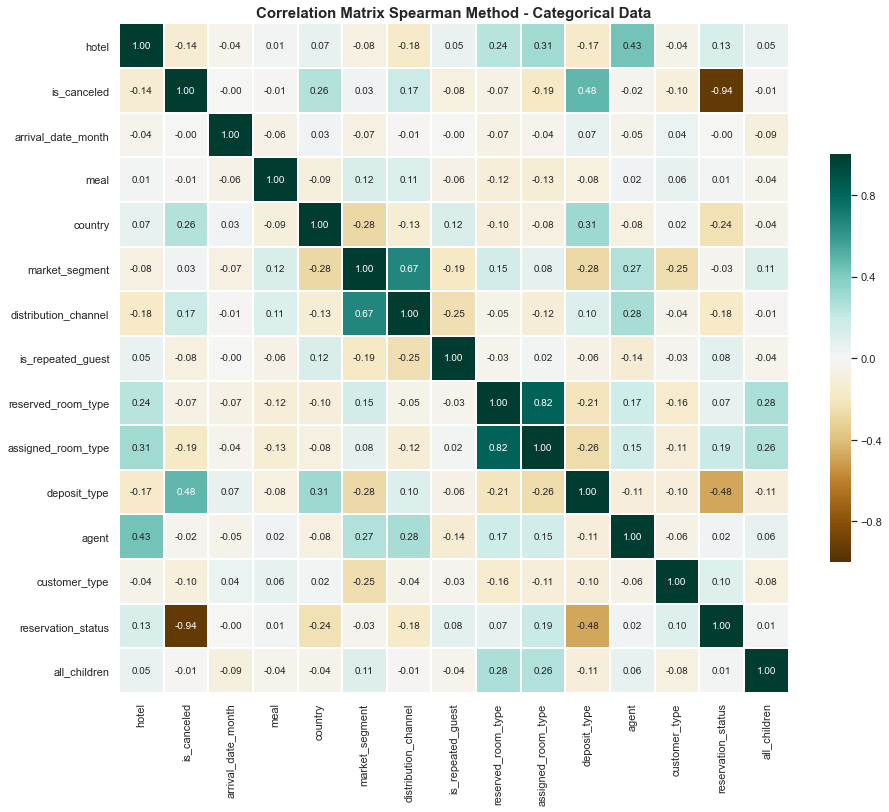

In [90]:
# Use spearman method 
plt.figure(figsize = (15,15))
corr_categorical = data_categorical.corr(method='spearman')
ax = sns.heatmap(corr_categorical, annot=True, fmt = '.2f',
                cmap='BrBG', vmin = -1,
                vmax=1, center = 0,
                square = True,
                linewidths = 2, cbar_kws={'shrink': .5}).set(ylim=(15,0))
plt.title("Correlation Matrix Spearman Method - Categorical Data", size= 15, weight='bold')

In [101]:
print('Customer Type: ', cleaned_data['customer_type'].unique())
print('Reservation Status: ', cleaned_data['reservation_status'].unique())
print('Deposit Type: ', cleaned_data['deposit_type'].unique())
print('Assigned Room Type: ', cleaned_data['assigned_room_type'].unique())
print('Meal: ', cleaned_data['meal'].unique())
print('Country: ', cleaned_data['country'].unique())
print("Distribution Channel: ", cleaned_data['distribution_channel'].unique())
print('Market Segment: ', cleaned_data['market_segment'].unique())
print('Reserved Room Type: ', cleaned_data['reserved_room_type'].unique())

Customer Type:  [2 0 3 1]
Reservation Status:  [1 0 2]
Deposit Type:  [0 2 1]
Assigned Room Type:  [ 2  0  3  4  6  5  8  1  7 10  9]
Meal:  [0 1 2 3]
Country:  [135  59 169  51  76  56 171 139 124 127   6 133  43  15  29  34  66  81
 123  46 140 154  11  52  42  25  54 113  27 100 153   3  75  31 107 103
 166 148 101 134 149  30  12  23  99 162 175   1  80  40 176  37 177  48
  91  38  72   5 161  82  71  69  77  60   4  63 168  83  28  41  35  61
  92 121 106 172 152  55  86 128  73  94 131 144 155  13  20 126 158  47
 108 117   7  85  98  39  33  22 115  36 151 165  19  32  84 156 145  14
 142 174 132 138  50 130 110 116  49 105  79 170 125  21 102 157 163  44
 150  90  53  78  70 141  88 104  18  74 159 122  16 173 164  58  62 160
  64  87  97  65 112 167 118  57 111 129  17  95 109 119  24 136  26   0
   2 147  45 137  68  96   9  67   8 114 120  89 143  10 146  93]
Distribution Channel:  [1 0 3 4 2]
Market Segment:  [3 2 6 5 1 4 7 0]
Reserved Room Type:  [2 0 3 4 6 5 7 8 1]


Now we have clear idea what our data look like. 

In [102]:
df_cleaned = cleaned_data.drop(['reservation_status','children','reservation_status_date'], axis = 1)
df_cleaned.head()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0      1            0        342               2015                   5   
1      1            0        737               2015                   5   
2      1            0          7               2015                   5   
3      1            0         13               2015                   5   
4      1            0         14               2015                   5   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...             0   
1                        0                     0       2  ...             0   
2                        0                     1       1  ...             0   
3                        0                     1       1  ...             0   
4                        0                     2       2  ...             0   

   agent  company  days_in_waiting_list  customer_type   adr  \
0      0      0.0                     0              2   0.0   
1      0      0.0                     0              2   0.0   
2      0      0.0                     0              2  75.0   
3    221      0.0                     0              2  75.0   
4    174      0.0                     0              2  98.0   

   required_car_parking_spaces  total_of_special_requests  adr_pp  \
0                            0                          0     0.0   
1                            0                          0     0.0   
2                            0                          0    75.0   
3                            0                          0    75.0   
4                            0                          1    49.0   

   all_children  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  

[5 rows x 31 columns]

In [104]:
cancel_corr = cleaned_data.corr()['is_canceled']
cancel_corr

hotel                            -0.137082
is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_month               -0.001269
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
meal                             -0.015219
country                           0.265220
market_segment                    0.059419
distribution_channel              0.167707
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
reserved_room_type               -0.062216
assigned_room_type               -0.175843
booking_changes                  -0.144832
deposit_type                      0.468676
agent      

Data preprocessing is a data mining technique which is used to transform the raw data in a useful and efficient way (GeeksforGeeks,2021). 
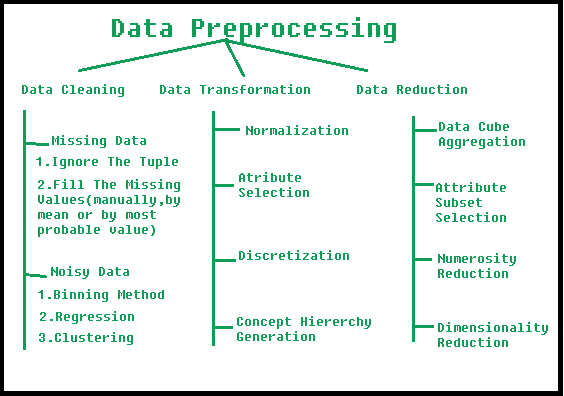

This is the most important part in preparing the data for machine learning 

In [204]:
num_features = ['lead_time', 'arrival_date_week_number',"arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]
cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

features = num_features + cat_features
# Separate features and labels 
X = data.drop('is_canceled',axis=1)[features]
y= data['is_canceled']

# Creating the piples to preprocessing the data 
num_transformer = SimpleImputer(strategy = 'constant')

# Pipeline Initialization 
cat_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

# Bundle preprocessing for numerical and categorical features 
preprocessor = ColumnTransformer(transformers = [("num", num_transformer, num_features),
                                                ("cat", cat_transformer, cat_features)])

The best practice to find a good machine learning model is to test multiple algorithm that can give the best accuracy score 

In [113]:
# create a a variable  to Initialize model 
base_models = [('DT_model', DecisionTreeClassifier(random_state=42)),
              ('RF_model', RandomForestClassifier(random_state=42, n_jobs=-1)),
              ('LR_model', LogisticRegression(random_state=42, n_jobs=-1)),
              ('XGB_model', XGBClassifier(random_state=42, n_jobs=-1))]
# cross-validation fold
kfold = 4
split = KFold(n_splits=kfold, shuffle=True, random_state=42)

# Preprocessing , fitting , making prediction and scorring everymodel

for name, model in base_models: 
    model_steps = Pipeline(steps=[('preprocessing', preprocessor),
                                 ('model',model)])
    
    cv_results = cross_val_score(model_steps, 
                                X,y,
                                cv=split,
                                scoring = 'accuracy',
                                n_jobs=-1)
    
    min_score = round(min(cv_results),4)
    max_score = round(max(cv_results),4)
    mean_score = round(np.mean(cv_results),4)
    std_dev = round(np.std(cv_results), 4)
    print(f'{name} cross validation score : {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}')


DT_model cross validation score : 0.8246 +/- 0.0016 (std) min: 0.8221, max: 0.8263
RF_model cross validation score : 0.8664 +/- 0.0012 (std) min: 0.8646, max: 0.8676
LR_model cross validation score : 0.7936 +/- 0.0013 (std) min: 0.7918, max: 0.7953
XGB_model cross validation score : 0.8473 +/- 0.0011 (std) min: 0.8456, max: 0.8487


Random Forst Classifier model has a better validation score. Lets see how wecan imporove our model

# Model Evaluation

In [220]:
# builing an evaluation function 
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
# Split the data into train and test set
np.random.seed(42)

# Initiate the model 
model = Pipeline(steps=[('preprocessing', preprocessor),
                      ('model', RandomForestClassifier())
                      
])


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Train the model 
model.fit(X_train,y_train)
# Validation mean score would egal to the same above 
cv_results = cross_val_score(model, 
                                X,y,
                                cv=split,
                                scoring = 'accuracy',
                                n_jobs=-1)




In [150]:
# Look for prediction 
y_preds = y_preds = model.predict(X_test)

In [210]:
y_preds

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [221]:
hotel_X = hotel_booking.fit_transform(X)
X_transformed = pd.DataFrame(hotel_X)

X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.2, random_state=42)

In [222]:

# Different RandomForestClassifier hyperparameters

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

gs_model = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [223]:
gs_model.best_params_


{'n_estimators': 60,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': None}

In [229]:
gs_model.score(X_test,y_test)

0.8576513945891616

In [242]:
# Another hyperparameter grid similar to rs_clf.best_params_
grid_2 = {'n_estimators': [1200, 1500, 2000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

np.random.seed(42)
# Initiate model 
grid_model = RandomForestClassifier(n_jobs=1)
gs_clf = GridSearchCV(estimator=grid_model,
                      param_grid=grid_2,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time= 2.9min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time= 2.7min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time= 2.7min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time= 2.6min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time= 2.6min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time= 3.4min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time= 3.4min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_s

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time= 3.3min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time= 3.3min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time= 3.3min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time= 4.4min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time= 4.5min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time= 4.6min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time= 4.5min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time= 4.5min
[CV] END max_dep

[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time= 1.6min
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=  57.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=  58.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time= 1.0min
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=  57.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=  57.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1500; total time= 1.2min
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1500; total time= 1.2min
[CV] END max_depth=5, max_features=auto,

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500; total time= 1.3min
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500; total time= 1.2min
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000; total time= 1.6min
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000; total time= 1.6min
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000; total time= 1.6min
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000; total time= 1.7min
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000; total time= 1.6min
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  57.8s
[CV] END max_depth=5, max_features=sqrt,

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time= 1.5min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time= 1.5min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time= 1.6min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500; total time= 2.0min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500; total time= 2.0min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500; total time= 1.9min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500; total time= 2.0min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500; total time= 1.9min
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time= 2.6min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time= 2.5min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time= 2.5min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time= 2.7min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time= 2.5min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time= 1.5min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time= 1.5min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time= 1.5min
[CV] END max_depth=10, max_featu

In [243]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 1200}

# k-nearest neighbor algorithm:
This algorithm is used to solve the classification model problems. K-nearest neighbor or K-NN algorithm basically creates an imaginary boundary to classify the data. When new data points come in, the algorithm will try to predict that to the nearest of the boundary line.

Therefore, larger k value means smother curves of separation resulting in less complex models. Whereas, smaller k value tends to overfit the data and resulting in complex models.

Note: It’s very important to have the right k-value when analyzing the dataset to avoid overfitting and underfitting of the dataset.

Using the k-nearest neighbor algorithm we fit the historical data (or train the model) and predict the future. (GeeksforGeeks, 2021) 

In [224]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [225]:
train_scores

[0.9884412429851747,
 0.893887679035095,
 0.882307982243069,
 0.8545208978976464,
 0.8474013736493844,
 0.8349003266605244,
 0.8300841779043471,
 0.8226400871094731,
 0.8179181673506994,
 0.8128926208225145,
 0.81032749811542,
 0.8051239634810285,
 0.8032289136443588,
 0.7990095485384036,
 0.7967585224893207,
 0.7942143395594271,
 0.7919947231761454,
 0.7902253120026803,
 0.7887385878214256,
 0.7862886338889354]

In [227]:
test_scores

[0.7886338889354217,
 0.8004439232766564,
 0.7815562442415612,
 0.7889270458162325,
 0.7757768657341486,
 0.7834827037440322,
 0.7733897311332607,
 0.7768238545941871,
 0.7725102604908284,
 0.7731384538068515,
 0.7698299690091297,
 0.7703325236619483,
 0.7676522321802496,
 0.7694949325739174,
 0.7640924700561186,
 0.7667308819834157,
 0.7630873607504817,
 0.765055699807354,
 0.7612027808024122,
 0.7609096239216014]

Maximum KNN score on the test data: 80.04%


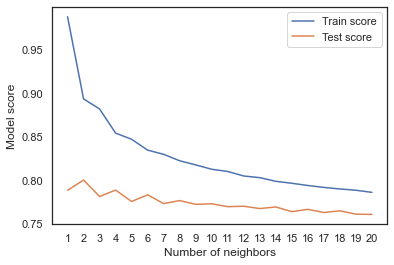

In [228]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [234]:
# Enhance RF model with the best parameters I found: 
np.random.seed(42)
enhanced_model = RandomForestClassifier(n_estimators =60,
                                       min_samples_split = 18,
                                       min_samples_leaf = 1,
                                       max_depth = None)
split = KFold(n_splits=kfold, shuffle = True)
                                       
cv_accuracy = cross_val_score(enhanced_model,
                             X_transformed,y,
                             cv=split,
                             scoring = 'accuracy',
                             n_jobs=-1)

cv_precision = cross_val_score(enhanced_model,
                             X_transformed,y,
                             cv=split,
                             scoring = 'precision',
                             n_jobs=-1)

cv_recall = cross_val_score(enhanced_model,
                             X_transformed,y,
                             cv=split,
                             scoring = 'recall',
                             n_jobs=-1)

cv_f1 = cross_val_score(enhanced_model,
                             X_transformed,y,
                             cv=split,
                             scoring = 'f1',
                             n_jobs=-1)

print(f'Enhanced Accuracy Model :{np.mean(cv_accuracy):,.4f} ---- Enhanced precision Model : {np.mean(cv_precision):,.4f} ----Enhanced Recall Model :{np.mean(cv_recall):,.4f} ------- Enhanced F1 Model :{np.mean(cv_f1):,.4f}')

Enhanced Accuracy Model :0.8571 ---- Enhanced precision Model : 0.8654 ----Enhanced Recall Model :0.7227 ------- Enhanced F1 Model :0.7874


In [245]:
# Enhance RF model with the best parameters I found: 
np.random.seed(42)
{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 1200}
grids_model = RandomForestClassifier(n_estimators =1200,
                                        max_features = 'sqrt',
                                        min_samples_split = 4,
                                        min_samples_leaf = 1,
                                        max_depth = None)
split = KFold(n_splits=kfold, shuffle = True)
                                       
cv_accuracy1 = cross_val_score(grids_model,
                             X_transformed,y,
                             cv=split,
                             scoring = 'accuracy',
                             n_jobs=-1)

cv_precision1 = cross_val_score(grids_model,
                             X_transformed,y,
                             cv=split,
                             scoring = 'precision',
                             n_jobs=-1)

cv_recall1 = cross_val_score(grids_model,
                             X_transformed,y,
                             cv=split,
                             scoring = 'recall',
                             n_jobs=-1)

cv_f1_ = cross_val_score(grids_model,
                             X_transformed,y,
                             cv=split,
                             scoring = 'f1',
                             n_jobs=-1)

print(f'Enhanced Accuracy Model :{np.mean(cv_accuracy1):,.4f} ---- Enhanced precision Model : {np.mean(cv_precision1):,.4f} ----Enhanced Recall Model :{np.mean(cv_recall1):,.4f} ------- Enhanced F1 Model :{np.mean(cv_f1_):,.4f}')

Enhanced Accuracy Model :0.8668 ---- Enhanced precision Model : 0.8661 ----Enhanced Recall Model :0.7587 ------- Enhanced F1 Model :0.8085


In [251]:
cv_metrics = pd.DataFrame({"Accuracy": cv_accuracy1,
                           "Precision": cv_precision1,
                           "Recall": cv_recall1,
                           "F1": cv_f1_})
                          
cv_metrics

Accuracy  Precision    Recall        F1
0  0.867529   0.866598  0.761190  0.803634
1  0.866323   0.865082  0.761727  0.806478
2  0.867357   0.869009  0.754109  0.809837
3  0.866017   0.863896  0.757740  0.814192

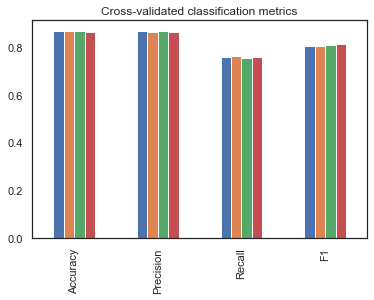

In [254]:
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [257]:
grids_model.fit(X_train,y_train)

In [260]:
grids_model.score(X_train,y_train)

0.9789031744702237

In [282]:
enhance_preds = grids_model.predict(X_test)

In [288]:
Booking = pd.DataFrame({'Test Set': y_test,
                       'prediction': enhance_preds })
Booking.head(10)

Test Set  prediction
30946          0           0
40207          1           1
103708         0           0
85144          0           0
109991         0           0
110622         0           1
47790          1           1
44992          0           0
30528          0           0
16886          0           0

There are different algorithms we can use to improve the model. But for the time being, you should be equipped with some of the most useful features of the library to start trying to apply them to your own problems. 
Next Project, i will use different algorithm and change the code a little. It was a fun experience learning from some people online. 

# References
1- Nuno Antonio, Ana de Almeida, Luis Nunes,Hotel booking demand datasets, Data in Brief, Volume 22, 2019,Pages 41-49,
ISSN 2352-3409, https://doi.org/10.1016/j.dib.2018.11.126 (https://www.sciencedirect.com/science/article/pii/S2352340918315191)

2- Matplotlib, BoxPlot, 2021
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

3 GeeksforGeeks, k-nearest neighbor algorithm in Python, 08 Aug 2021,
https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/
